## Project 
### Chennai House Price Prediction

#### Problem Statement:
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

#### Note:
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.


### Required Libraries and Modules 

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

### Importing the Data

In [70]:
df = pd.read_csv('train-chennai-sale.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [71]:
dir(df) ## List of Attributes 

['AREA',
 'BUILDTYPE',
 'COMMIS',
 'DATE_BUILD',
 'DATE_SALE',
 'DIST_MAINROAD',
 'INT_SQFT',
 'MZZONE',
 'N_BATHROOM',
 'N_BEDROOM',
 'N_ROOM',
 'PARK_FACIL',
 'PRT_ID',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'QS_ROOMS',
 'REG_FEE',
 'SALES_PRICE',
 'SALE_COND',
 'STREET',
 'T',
 'UTILITY_AVAIL',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

### Exploratory Data Analysis and Data Preprocessing 

In [73]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7104    False
7105    False
7106    False
7107    False
7108    False
Length: 7109, dtype: bool

In [74]:
original_data = df.shape

In [75]:
data = df.drop_duplicates()
duplicate = data.shape

In [76]:
print(f"The original DataSet has {original_data} rows and columns where the data set after droping duplicates is {duplicate}. ")

The original DataSet has (7109, 22) rows and columns where the data set after droping duplicates is (7109, 22). 


In [77]:
pd.isnull(data).any() # returns 'True' if there are any missing values in column

PRT_ID           False
AREA             False
INT_SQFT         False
DATE_SALE        False
DIST_MAINROAD    False
N_BEDROOM         True
N_BATHROOM        True
N_ROOM           False
SALE_COND        False
PARK_FACIL       False
DATE_BUILD       False
BUILDTYPE        False
UTILITY_AVAIL    False
STREET           False
MZZONE           False
QS_ROOMS         False
QS_BATHROOM      False
QS_BEDROOM       False
QS_OVERALL        True
REG_FEE          False
COMMIS           False
SALES_PRICE      False
dtype: bool

#### From above we can observe that there are null valuse in the most of features of Dataset which really good which does not lead us to model inconsistency. But three features has null values that we will fill them.

In [78]:
data['N_BEDROOM'] = data['N_BEDROOM'].fillna(data['N_BEDROOM'].mean())
data['N_BATHROOM'] = data['N_BATHROOM'].fillna(data['N_BATHROOM'].mean())
data['QS_OVERALL'] = data['QS_OVERALL'].fillna(data['QS_OVERALL'].mean())

In [79]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['PRT_ID'] = labelencoder.fit_transform(data['PRT_ID'])
data['AREA'] = labelencoder.fit_transform(data['AREA'])
data['DATE_SALE'] = labelencoder.fit_transform(data['DATE_SALE'])
data['SALE_COND'] = labelencoder.fit_transform(data['SALE_COND'])
data['PARK_FACIL'] = labelencoder.fit_transform(data['PARK_FACIL'])
data['DATE_BUILD'] = labelencoder.fit_transform(data['DATE_BUILD'])
data['BUILDTYPE'] = labelencoder.fit_transform(data['BUILDTYPE'])
data['UTILITY_AVAIL'] = labelencoder.fit_transform(data['UTILITY_AVAIL'])
data['STREET'] = labelencoder.fit_transform(data['STREET'])
data['MZZONE'] = labelencoder.fit_transform(data['MZZONE'])


### Exploratory Data Analysis

<AxesSubplot:title={'center':'Correlation Plot'}>

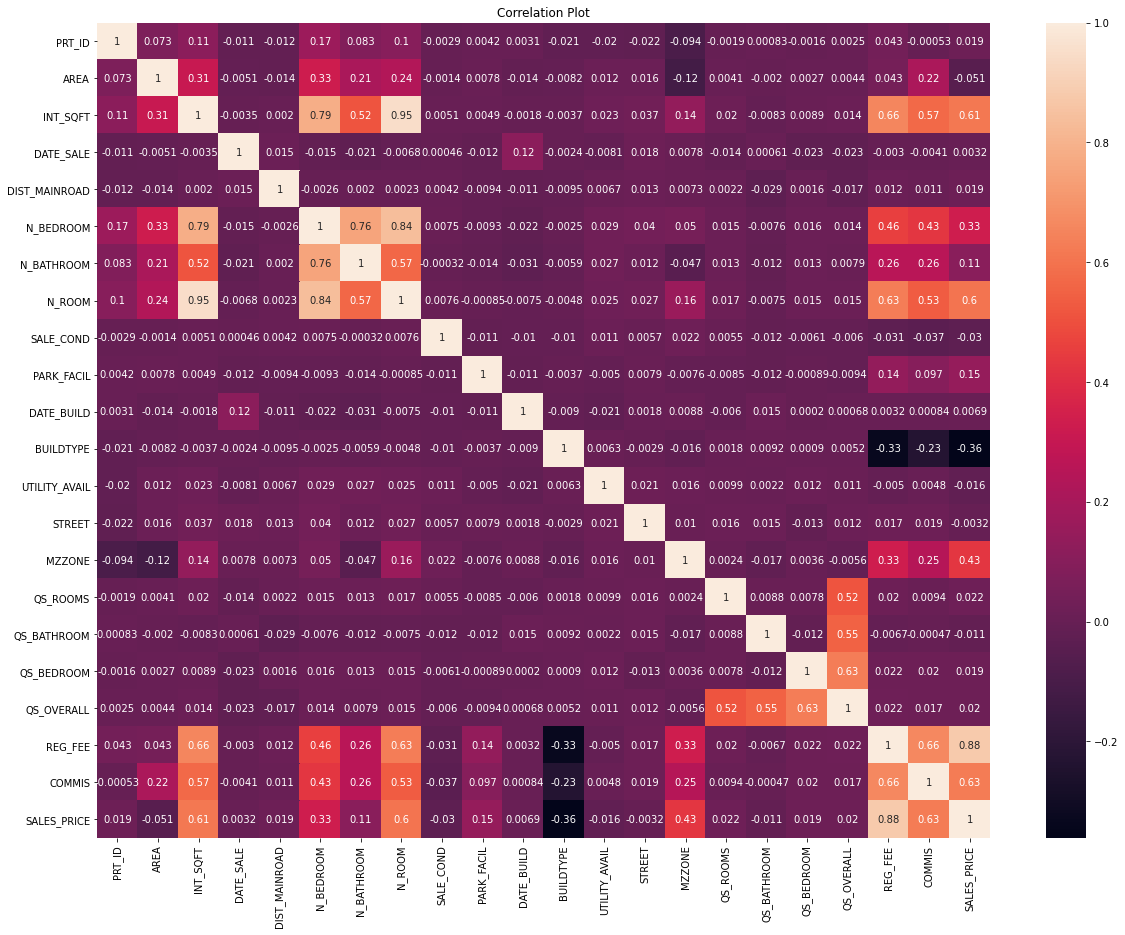

In [80]:
plt.figure(figsize=(20,15))
plt.title('Correlation Plot')
sns.heatmap(data.corr(), annot=True)

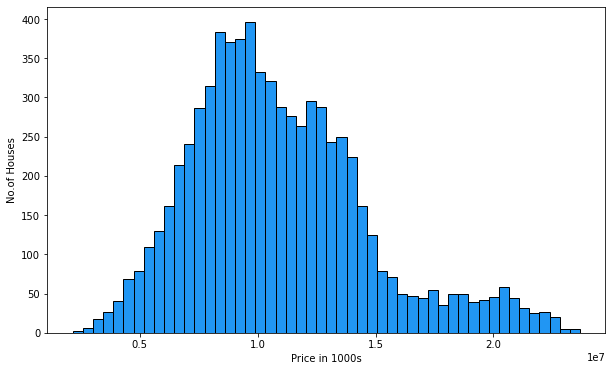

In [81]:
plt.figure(figsize=(10,6))
plt.hist(data['SALES_PRICE'], bins=50, ec='black', color= '#2196f3')# Ploting histogram
plt.xlabel('Price in 1000s')
plt.ylabel('No.of Houses')
plt.show()

### Correlation Plot:
From correaltion the intution that we can take is what are features are correlated with the target feature 'SALE_PRICE' and accordingly we can eliminate the features that which are not that important for the model so, that model works good.

### Histogram:
The main Idea for plotting histogram is that the target variable 'SALE_PRICE' is we can observe is there are outliers are this in the data so that we remove those.


In [83]:
data_d = data.drop(columns = ['DATE_BUILD','PRT_ID','DATE_SALE','SALE_COND','PARK_FACIL','DATE_BUILD','DIST_MAINROAD','N_BATHROOM','QS_ROOMS','QS_BEDROOM','QS_OVERALL','QS_BEDROOM'])

**Look for any outliers in all the remaining features using boxplot and remove them using IQR method**

In [84]:
L = []
IN = ['DATE_BUILD','PRT_ID','DATE_SALE','SALE_COND','PARK_FACIL','DATE_BUILD','DIST_MAINROAD','N_BATHROOM','QS_ROOMS','QS_BEDROOM','QS_OVERALL','QS_BEDROOM']
for i in data:
    if i not in IN:
        L.append(i)

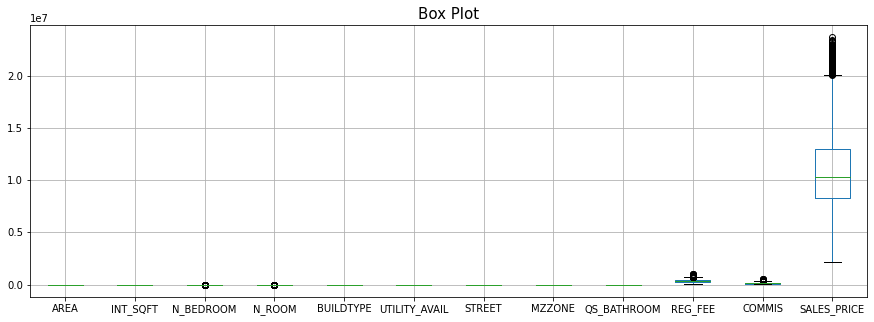

In [85]:
data_d.boxplot(column=L,figsize=(15,5))
plt.title('Box Plot',fontsize= 15)
plt.show()

<ipython-input-86-fcb534b688ce>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_d = data_d[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 *IQR))).any(axis=1)]
<ipython-input-86-fcb534b688ce>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_d = data_d[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 *IQR))).any(axis=1)]


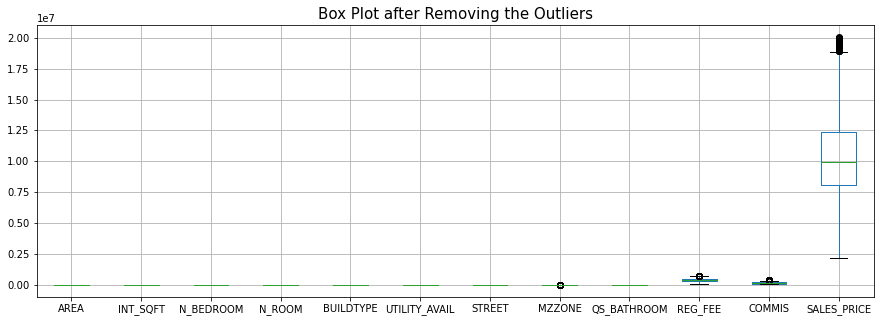

In [86]:
Q1 = data_d.quantile(0.25)
Q3 = data_d.quantile(0.75)
IQR = Q3 - Q1
data_d = data_d[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 *IQR))).any(axis=1)]

data_d.boxplot(column=L,figsize=(15,5))
plt.title('Box Plot after Removing the Outliers',fontsize= 15)
plt.show()

### Model 

#### With Simple Linear Regression the Sale Prices can Estimated as show here.

In [88]:
prices = data_d['SALES_PRICE']
features = data_d.drop('SALES_PRICE', axis=1) # return new dataframe without target

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)

In [90]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [93]:
from sklearn.metrics import r2_score, mean_squared_error
y_predict = regression.predict(X_test)
score = round(regression.score(X_train, y_train),2)
r2score = round(r2_score(y_test, y_predict),4)
print(f"The Training Score: {score} ")
print(f"R2_score: {r2score}")

The Training Score: 0.82 
R2_score: 0.8225
